<pre>
██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
 ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
  ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
   ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
   ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                  ▀▀                                     
</pre>
<div align='right'>
    By Guilherme Ruiz
</div>

Table of Contents
=================

*   [1  Preamble](#Preamble)
    *   [1.1  Imports](#Imports)
    *   [1.2  Lists](#Lists)
    *   [1.3  Formatting functions](#Formatting-functions)
    *   [1.4  API call functions](#API-call-functions)
*   [2  Data aquisition](#Data-aquisition)
    *   [2.1  Fetch online data](#Fetch-online-data)
    *   [2.2  Format data](#Format-data)
    *   [2.3  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load latest file](#Load-latest-file)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualisation](#Data-visualisation)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Card types](#Card-types)
    *   [4.3  Monsters](#Monsters)
        *   [4.3.1  Attributes](#Attributes)
        *   [4.3.2  Primary types](#Primary-types)
            *   [4.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [4.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [4.3.2.3  By attribute](#By-attribute)
        *   [4.3.3  Secondary types](#Secondary-types)
            *   [4.3.3.1  By attribute](#By-attribute)
            *   [4.3.3.2  By secondary type](#By-secondary-type)
        *   [4.3.4  Monster types](#Monster-types)
            *   [4.3.4.1  By Attribute](#By-Attribute)
            *   [4.3.4.2  By primary type](#By-primary-type)
            *   [4.3.4.3  By secondary type](#By-secondary-type)
        *   [4.3.5  Effect type](#Effect-type)
        *   [4.3.6  ATK](#ATK)
        *   [4.3.7  DEF](#DEF)
        *   [4.3.8  Level/Rank](#Level/Rank)
            *   [4.3.8.1  ATK statistics](#ATK-statistics)
            *   [4.3.8.2  DEF statistics](#DEF-statistics)
        *   [4.3.9  Pendulum scale](#Pendulum-scale)
            *   [4.3.9.1  ATK statistics](#ATK-statistics)
            *   [4.3.9.2  DEF statistics](#DEF-statistics)
            *   [4.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [4.3.10  Link](#Link)
            *   [4.3.10.1  ATK statistics](#ATK-statistics)
        *   [4.3.11  Link Arrows](#Link-Arrows)
            *   [4.3.11.1  By combination](#By-combination)
            *   [4.3.11.2  By unique](#By-unique)
            *   [4.3.11.3  By link](#By-link)
    *   [4.4  Spell & Trap](#Spell-&-Trap)
        *   [4.4.1  Properties](#Properties)
        *   [4.4.2  Effect type](#Effect-type)
            *   [4.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [4.5  Archseries](#Archseries)
        *   [4.5.1  By card type](#By-card-type)
        *   [4.5.2  By primary type](#By-primary-type)
        *   [4.5.3  By secondary type](#By-secondary-type)
        *   [4.5.4  By monster type](#By-monster-type)
        *   [4.5.5  By property](#By-property)
    *   [4.6  Artworks](#Artworks)
        *   [4.6.1  By card type](#By-card-type)
        *   [4.6.2  By primary type](#By-primary-type)
    *   [4.7  Errata](#Errata)
        *   [4.7.1  By card type](#By-card-type)
        *   [4.7.2  By primary type](#By-primary-type)
        *   [4.7.3  By artwork](#By-artwork)
    *   [4.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [4.8.1  TGC status](#TGC-status)
            *   [4.8.1.1  By card type](#By-card-type)
            *   [4.8.1.2  By monster type](#By-monster-type)
            *   [4.8.1.3  By archseries](#By-archseries)
        *   [4.8.2  OCG status](#OCG-status)
            *   [4.8.2.1  By card type](#By-card-type)
            *   [4.8.2.2  By monster type](#By-monster-type)
            *   [4.8.2.3  By archseries](#By-archseries)
        *   [4.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [5  Searches](#Searches)
*   [6  HTML export](#HTML-export)

# Preamble

## Imports

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib_venn import venn2
from datetime import datetime
from ast import literal_eval

## Lists

In [2]:
# Attributes to split monsters query
attributes = ['DIVINE', 'LIGHT', 'DARK', 'WATER', 'EARTH', 'FIRE', 'WIND']

# API variables
api_url = 'https://yugipedia.com/api.php'

# Styling dictionaries
arrows_dict = {'Middle-Left': '\u2190', 'Middle-Right': '\u2192', 'Top-Left': '\u2196', 'Top-Center': '\u2191', 'Top-Right': '\u2197', 'Bottom-Left': '\u2199', 'Bottom-Center': '\u2193', 'Bottom-Right': '\u2198'}
card_colors = {'Effect Monster': '#FF8B53', 'Normal Monster': '#FDE68A', 'Ritual Monster': '#9DB5CC', 'Fusion Monster': '#A086B7', 'Synchro Monster': '#CCCCCC', 'Xyz Monster': '#000000', 'Link Monster': '#00008B', 'Pendulum Monster': 'r', 'Monster Card': '#FF8B53', 'Spell Card': '#1D9E74', 'Trap Card': '#BC5A84', 'Monster Token': '#C0C0C0', 'FIRE': '#fd1b1b', 'WATER': '#03a9e6', 'EARTH': '#060d0a', 'WIND': '#77bb58', 'DARK': '#745ea5', 'LIGHT': '#9d8047', 'DIVINE': '#7e6537', 'Level': '#f1a41f'}

## Formatting functions

In [3]:
def extract_results(df):
    df = pd.DataFrame(df['query']['results']).transpose()
    df = pd.DataFrame(df['printouts'].values.tolist())
    return df

def extract_artwork(row):
    result = tuple()
    if 'Category:OCG/TCG cards with alternate artworks' in row:
        result += ('Alternate',)
    if 'Category:OCG/TCG cards with edited artworks' in row:
        result += ('Edited',)
    if result == tuple():
        return np.nan
    else:
        return result

def concat_errata(row):
    result = tuple()
    if row['Name errata']:
        result += ('Name',)
    if row['Type errata']:
        result += ('Type',)
    if result == tuple():
        return np.nan
    else:
        return result 
    
def format_df(input_df, input_errata_df):
    df = pd.DataFrame()
    if 'Name' in input_df.columns:
        df['Name'] = input_df['Name'].dropna().apply(lambda x: x[0])
    if 'Password' in input_df.columns:
        df['Password'] = input_df['Password'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Card type' in input_df.columns:
        df['Card type'] = input_df['Card type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Property' in input_df.columns:
        df['Property'] = input_df['Property'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Primary type' in input_df.columns:
        df['Primary type'] = input_df['Primary type'].dropna().apply(lambda x: [i['fulltext'] for i in x] if len(x)>0 else []).apply(lambda y: list(filter(lambda z: z != 'Pendulum Monster', y)) if len(y)>0 else []).apply(lambda y: list(filter(lambda z: z != 'Effect Monster', y))[0] if len(y)>1 else (y[0] if len(y)>0 else np.nan))
    if 'Secondary type' in input_df.columns:
        df['Secondary type'] = input_df['Secondary type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Attribute' in input_df.columns:
        df['Attribute'] = input_df['Attribute'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Monster type' in input_df.columns:
        df['Monster type'] = input_df['Monster type'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Level/Rank' in input_df.columns:
        df['Level/Rank'] = input_df['Level/Rank'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'ATK' in input_df.columns:
        df['ATK'] = input_df['ATK'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'DEF' in input_df.columns:
        df['DEF'] = input_df['DEF'].dropna().apply(lambda x: x[0] if len(x)>0 else np.nan)
    if 'Pendulum Scale' in input_df.columns:
        df['Pendulum Scale'] = input_df['Pendulum Scale'].dropna().apply(lambda x: str(x[0]) if len(x)>0 else np.nan)
    if 'Link' in input_df.columns:
        df['Link'] = input_df['Link'].dropna().apply(lambda x: str(x[0]) if len(x)>0 else np.nan)
    if 'Link Arrows' in input_df.columns:
        df['Link Arrows'] = input_df['Link Arrows'].dropna().apply(lambda x: tuple([arrows_dict[i] for i in sorted(x)]) if len(x)>0 else np.nan)
    if 'Effect type' in input_df.columns:
        df['Effect type'] = input_df['Effect type'].dropna().apply(lambda x: tuple(sorted([i['fulltext'] for i in x])) if len(x)>0 else np.nan)
    if 'Archseries' in input_df.columns:
        df['Archseries'] = input_df['Archseries'].dropna().apply(lambda x: tuple(sorted(x)) if len(x)>0 else np.nan)
    if 'Category' in input_df.columns:
        df['Artwork'] = input_df['Category'].dropna().apply(lambda x: [i['fulltext'] for i in x] if len(x)>0 else np.nan).apply(extract_artwork)
    # Erratas column
    if input_errata_df is not None and 'Page name' in input_df.columns:
        df['Errata'] = errata_df.merge(input_df['Page name'].dropna().apply(lambda x: x[0]).rename('Name'), right_on = 'Name', left_index = True).apply(concat_errata,axis = 1)
    #################
    if 'TCG status' in input_df.columns:
        df['TCG status'] = input_df['TCG status'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'OCG status' in input_df.columns:
        df['OCG status'] = input_df['OCG status'].dropna().apply(lambda x: x[0]['fulltext'] if len(x)>0 else np.nan)
    if 'Modification date' in input_df.columns:
        df['Modification date'] = input_df['Modification date'].dropna().apply(lambda x: pd.Timestamp(int(x[0]['timestamp']), unit='s').ctime() if len(x)>0 else np.nan)
    
    return df


## API call functions

In [4]:
def card_query(_password = True, _card_type = True, _property = True, _primary = True, _secondary = True, _attribute = True, _monster_type = True, _stars = True, _atk = True, _def = True, _scale = True, _link = True, _arrows = True, _effect_type = True, _archseries = True, _category = True, _tcg = True, _ocg = True, _date = True, _page_name = True):
    search_string = f'|?English%20name=Name'
    if _password:
        search_string += '|?Password'
    if _card_type:
        search_string += '|?Card%20type'
    if _property:    
        search_string += '|?Property'
    if _primary:
        search_string += '|?Primary%20type'
    if _secondary:
        search_string += '|?Secondary%20type'
    if _attribute:
        search_string += '|?Attribute'
    if _monster_type:
        search_string += '|?Type=Monster%20type'
    if _stars:
        search_string += '|?Stars%20string=Level%2FRank%20'
    if _atk:
        search_string += '|?ATK%20string=ATK'
    if _def:
        search_string += '|?DEF%20string=DEF'
    if _scale:
        search_string += '|?Pendulum%20Scale'
    if _link:
        search_string += '|?Link%20Rating=Link'
    if _arrows:
        search_string += '|?Link%20Arrows'
    if _effect_type:
        search_string += '|?Effect%20type'
    if _archseries:
        search_string += '|?Archseries'
    if _category:
        search_string += '|?category'
    if _tcg:
        search_string += '|?TCG%20status'
    if _ocg:
        search_string += '|?OCG%20status'
    if _date:
        search_string += '|?Modification%20date'
    if _page_name:
        search_string += '|?Page%20name'
    
    return search_string

def fetch_spell(spell_query, step = 5000, limit = 5000):
    print('Downloading Spells')
    spell_df = pd.DataFrame()
    for i in range(int(limit/step)):
        df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20Spell%20Cards]]{spell_query}|limit%3D{step}|offset={i*step}|order%3Dasc&format=json')
        df = extract_results(df)
        print(f'Iteration {i+1}: {len(df.index)} results')
        spell_df = pd.concat([spell_df, df], ignore_index=True, axis=0)
        if len(df.index)<step:
            break
                
    print(f'- Total\n{len(spell_df.index)} results\n')
    
    return spell_df

def fetch_trap(trap_query, step = 5000, limit = 5000):
    print('Downloading Traps')
    trap_df = pd.DataFrame()
    for i in range(int(limit/step)):    
        df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20Trap%20Cards]]{trap_query}|limit%3D{step}|offset={i*step}|order%3Dasc&format=json')
        df = extract_results(df)
        print(f'Iteration {i+1}: {len(df.index)} results')
        trap_df = pd.concat([trap_df, df], ignore_index=True, axis=0)
        if len(df.index)<step:
            break
                
    print(f'- Total\n{len(trap_df.index)} results\n')
    
    return trap_df

def fetch_monster(monster_query, step = 5000, limit = 5000):
    print('Downloading Monsters')
    monster_df = pd.DataFrame()
    for att in attributes:
        print(f"- {att}")
        for i in range(int(limit/step)):
            df = pd.read_json(f'{api_url}?action=ask&query=[[Concept:CG%20monsters]][[Attribute::{att}]]{monster_query}|limit%3D{step}|offset={i*step}|order%3Dasc&format=json')
            df = extract_results(df)
            print(f'Iteration {i+1}: {len(df.index)} results')
            monster_df = pd.concat([monster_df, df], ignore_index=True, axis=0)
            if len(df.index)<step:
                break
        
    print(f'- Total\n{len(monster_df.index)} results')
    
    return monster_df

def fetch_name_errata(limit = 1000):
    name_query_df = pd.read_json(f'{api_url}?action=ask&query=[[Category:Cards%20with%20name%20errata]]|limit={limit}|order%3Dasc&format=json')
    name_keys = list(name_query_df['query']['results'].keys())
    return pd.DataFrame(True, index = [i.split(':')[1].strip() for i in name_keys if 'Card Errata:' in i], columns = ['Name errata'])

def fetch_type_errata(limit = 1000):
    type_query_df = pd.read_json(f'{api_url}?action=ask&query=[[Category:Cards%20with%20card%20type%20errata]]|limit={limit}|order%3Dasc&format=json')
    type_keys = list(type_query_df['query']['results'].keys())
    return pd.DataFrame(True, index = [i.split(':')[1].strip() for i in type_keys if 'Card Errata:' in i], columns = ['Type errata'])

# Data aquisition

## Fetch online data

In [5]:
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)
# Timestamp
timestamp = pd.Timestamp.now().timestamp()
full_df = pd.DataFrame()

# Fetch Spell
spell_df = fetch_spell(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, spell_df], ignore_index=True, axis=0)

# Fetch Trap
trap_df = fetch_trap(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, trap_df], ignore_index=True, axis=0)
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0)

# Fetch Monster
monster_df = fetch_monster(monster_query, step = 1000, limit = 5000)
full_df = pd.concat([full_df, monster_df], ignore_index=True, axis=0)

# Fetch errata
errata_df = pd.concat([fetch_name_errata(), fetch_type_errata()], axis=1).fillna(False)

Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 375 results
- Total
2375 results

Iteration 1: 1000 results
Iteration 2: 811 results
- Total
1811 results

- DIVINE
Iteration 1: 9 results
- LIGHT
Iteration 1: 1000 results
Iteration 2: 619 results
- DARK
Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 223 results
- WATER
Iteration 1: 834 results
- EARTH
Iteration 1: 1000 results
Iteration 2: 877 results
- FIRE
Iteration 1: 668 results
- WIND
Iteration 1: 763 results
- Total
7993 results


## Format data

In [6]:
formatted_spell_df = format_df(spell_df, errata_df)
formatted_trap_df = format_df(trap_df, errata_df)
formatted_st_df = format_df(st_df, errata_df)
formatted_monster_df = format_df(monster_df, errata_df)
formatted_full_df = format_df(full_df, errata_df)
print('Data formated')

Data formated


## Save data

In [7]:
formatted_full_df.to_csv(f'Data/All_cards_{int(timestamp)}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load latest file

In [8]:
# Get list of files
list_of_files = sorted(glob.glob('Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(list_of_files)>1:
    latest_file = list_of_files[1]
    previous_df = pd.read_csv(latest_file, dtype=object)
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    print('File loaded')
else:
    print('No older files')

File loaded


## Generate changelog

In [9]:
if previous_df is None:
    print('No changes')
else:
    changelog = previous_df.merge(formatted_full_df,indicator = True, how='outer').loc[lambda x : x['_merge']!='both'].sort_values('Name', ignore_index=True)
    changelog['_merge'].replace(['left_only','right_only'],['Old', 'New'], inplace = True)
    changelog.rename(columns={"_merge": "Version"}, inplace = True)
    nunique = changelog.groupby('Name').nunique()
    cols_to_drop = nunique[nunique < 2].dropna(axis=1).columns
    changelog.drop(cols_to_drop, axis=1, inplace = True)
    changelog = changelog.set_index('Name')[nunique > 1]
    rows_to_keep = changelog.drop(['Modification date', 'Version'], axis=1).dropna(axis=0, how='all').index
    changelog = changelog.loc[rows_to_keep]
    display(changelog)
    

,Modification date,Version
Name,,


# Data visualisation

## Full data

In [10]:
formatted_full_df

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,...,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
0,"""A"" Cell Breeding Device",34541863,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Trigger Effect,)",NaN,NaN,"(Name,)",Unlimited,Unlimited,Sat Nov 6 13:57:15 2021
1,"""A"" Cell Incubator",64163367,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Continuous-like Effect, Trigger Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Mon Jun 13 04:27:51 2022
2,"""A"" Cell Recombination Device",91231901,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect, Ignition-like Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Thu Mar 12 22:40:14 2020
3,"""A"" Cell Scatter Burst",73262676,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,Unlimited,Unlimited,Sat Nov 6 13:58:32 2021
4,"""Infernoble Arms - Durendal""",37478723,Spell Card,Equip Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Condition, Ignition-like Effect, Trigger Effect)","(Noble Arms,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 20 13:52:48 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,Yosenju Shinchu L,65025250,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,3,NaN,NaN,"(Continuous Effect, Continuous-like Effect, Tr...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Aug 14 11:04:00 2022
12175,Yosenju Shinchu R,91420254,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,5,NaN,NaN,"(Continuous Effect, Ignition-like Effect, Trig...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 13 12:21:48 2022
12176,Yosenju Tsujik,25244515,Monster Card,NaN,Effect Monster,NaN,WIND,Beast-Warrior,4,1000,...,NaN,NaN,NaN,"(Condition, Ignition Effect, Quick Effect, Tri...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Dec 20 18:15:02 2020
12177,ZW - Eagle Claw,29353756,Monster Card,NaN,Effect Monster,NaN,WIND,Winged Beast,5,2000,...,NaN,NaN,NaN,"(Continuous-like Effect, Ignition Effect, Uncl...","(ZW -, Zexal)",NaN,NaN,Unlimited,Unlimited,Thu Jul 8 13:48:07 2021


## Card types

In [11]:
formatted_full_df.groupby('Card type').nunique()

,Name,Password,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Card type,,,,,,,,,,,,,,,,,,,,
Monster Card,7985,7882,0,8,6,7,25,15,82,77,13,6,62,223,990,3,3,7,7,7938
Spell Card,2373,2357,6,0,0,0,0,0,0,0,0,0,0,114,395,3,3,6,6,2362
Trap Card,1811,1796,3,0,0,0,0,0,0,0,0,0,0,95,324,2,3,6,6,1804


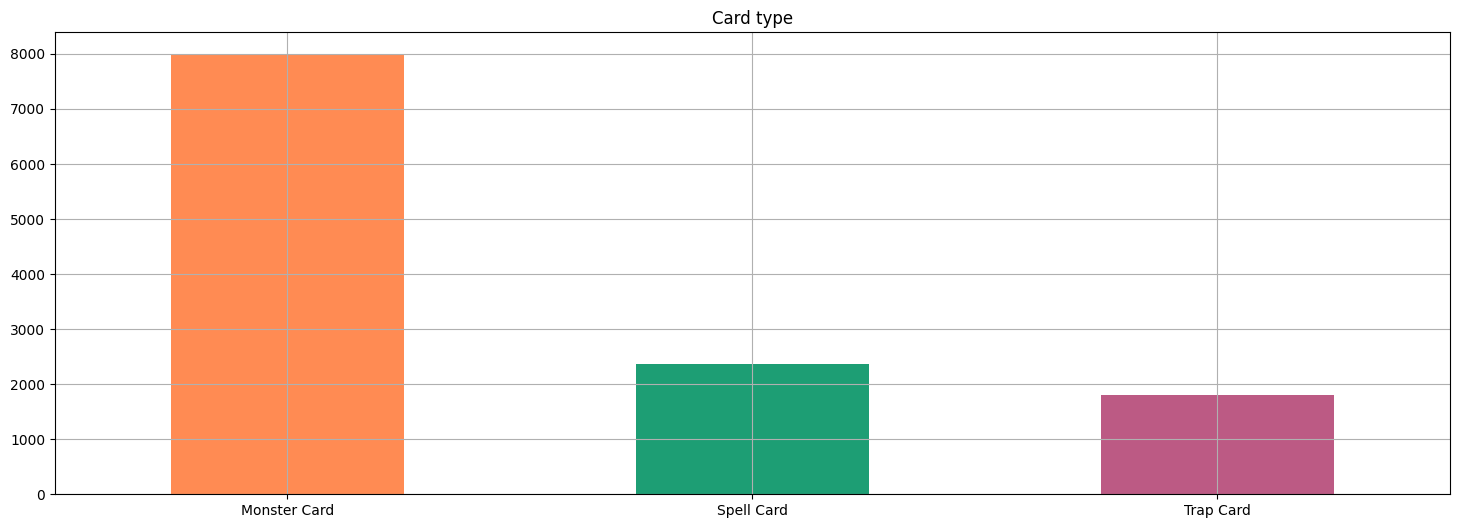

In [12]:
card_type_colors = [card_colors[i] for i in formatted_full_df['Card type'].value_counts().index]
formatted_full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [13]:
print('Total number of attributes:', formatted_monster_df['Attribute'].nunique())

Total number of attributes: 7


In [14]:
formatted_monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Password,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Attribute,,,,,,,,,,,,,,,,,,
DARK,2220,2185,7,6,23,14,70,63,12,6,41,154,451,3,3,7,7,2215
DIVINE,6,0,1,0,2,2,3,3,0,0,0,6,3,1,3,2,2,9
EARTH,1875,1860,7,6,23,12,71,60,12,4,29,128,329,3,3,6,6,1870
FIRE,668,664,8,6,22,12,43,40,8,4,22,85,185,3,3,4,6,666
LIGHT,1619,1588,7,6,23,14,58,50,10,5,30,131,383,3,3,6,7,1613
WATER,834,830,7,6,22,11,56,41,9,4,16,92,204,3,3,5,6,834
WIND,763,755,7,6,23,12,46,38,11,4,14,104,212,3,3,6,6,759


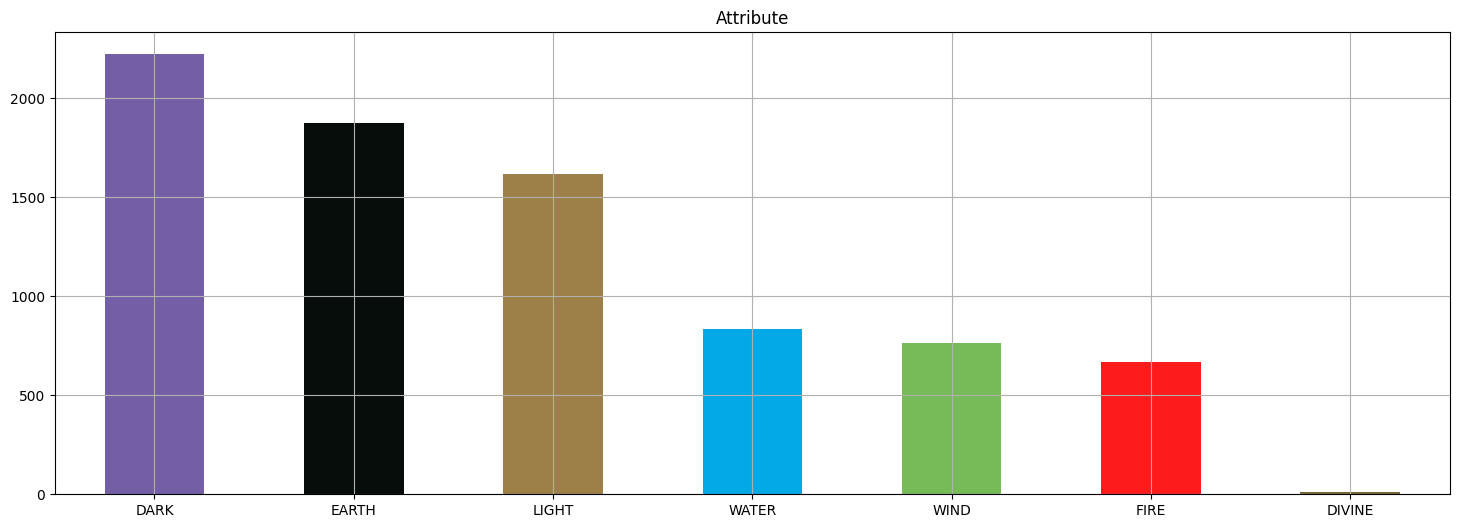

In [15]:
attribute_colors = [card_colors[i] for i in formatted_full_df['Attribute'].value_counts().index]
formatted_monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [16]:
print('Total number of primary types:', formatted_monster_df['Primary type'].nunique())

Total number of primary types: 8


In [17]:
formatted_monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Password,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Primary type,,,,,,,,,,,,,,,,,,
Effect Monster,5425,5384,6,7,25,12,73,66,13,0,0,203,774,3,3,6,6,5394
Fusion Monster,427,424,1,6,23,12,48,46,4,0,0,68,141,3,3,4,6,426
Link Monster,370,362,0,6,23,0,38,0,0,6,62,51,138,3,2,5,5,367
Monster Token,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1
Normal Monster,745,701,1,6,23,10,59,49,10,0,0,6,129,3,3,4,4,746
Ritual Monster,120,119,3,6,15,12,33,26,1,0,0,33,37,1,3,2,2,120
Synchro Monster,410,408,1,6,23,13,40,38,4,0,0,56,156,2,3,5,4,409
Xyz Monster,491,484,0,6,23,14,51,42,4,0,0,68,190,2,2,5,4,489


#### Has effect discrimination

In [18]:
has_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1)
effect

,Effect,No Effect
Effect Monster,5425.0,NaN
Xyz Monster,489.0,2.0
Synchro Monster,407.0,3.0
Fusion Monster,366.0,61.0
Link Monster,365.0,5.0
Ritual Monster,105.0,15.0
Normal Monster,34.0,712.0
Monster Token,NaN,1.0


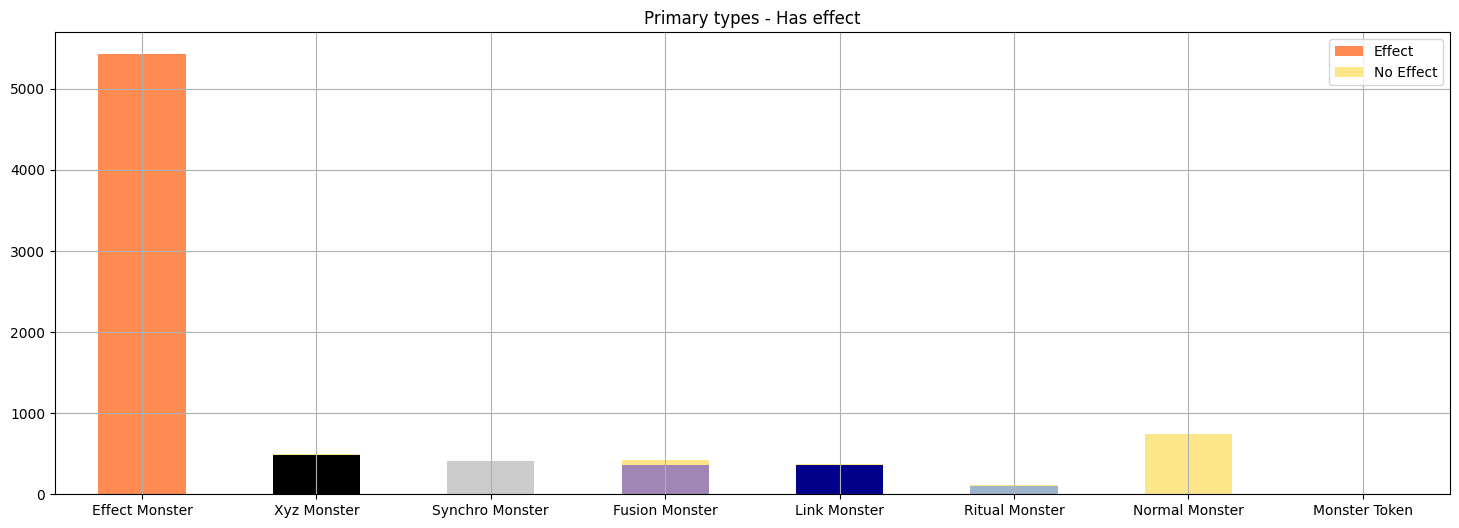

In [19]:
monster_type_colors = {'No Effect': card_colors['Normal Monster'], 'Effect': [card_colors[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
not_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1)
pendulum

,Not Pendulum,Pendulum
Effect Monster,5162,263.0
Normal Monster,708,38.0
Xyz Monster,484,7.0
Fusion Monster,417,10.0
Synchro Monster,404,6.0
Link Monster,370,NaN
Ritual Monster,119,1.0
Monster Token,1,NaN


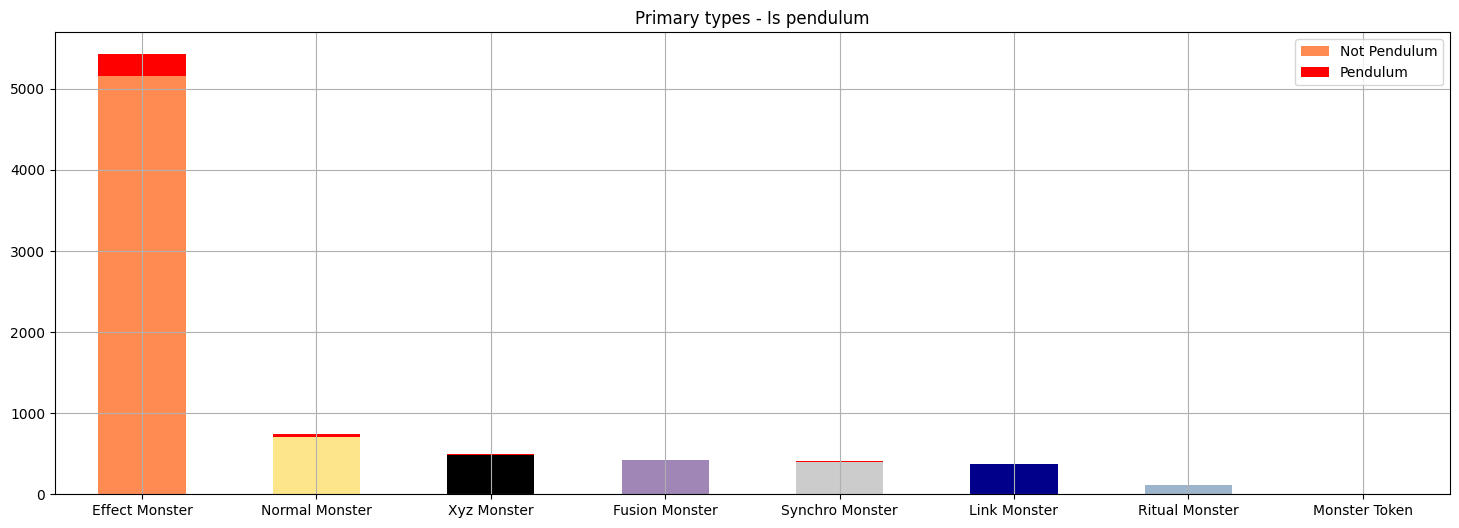

In [21]:
monster_type_colors_b = {'Pendulum': card_colors['Pendulum Monster'], 'Not Pendulum': [card_colors[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Attribute'])
primmary_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,,
Effect Monster,1491,6,1302,453,1093,551,529
Fusion Monster,148,0,81,34,97,34,33
Link Monster,121,0,76,33,86,29,25
Monster Token,0,0,0,1,0,0,0
Normal Monster,186,0,250,52,82,109,67
Ritual Monster,36,0,17,7,34,20,6
Synchro Monster,107,0,69,50,74,36,74
Xyz Monster,134,0,82,38,153,55,29


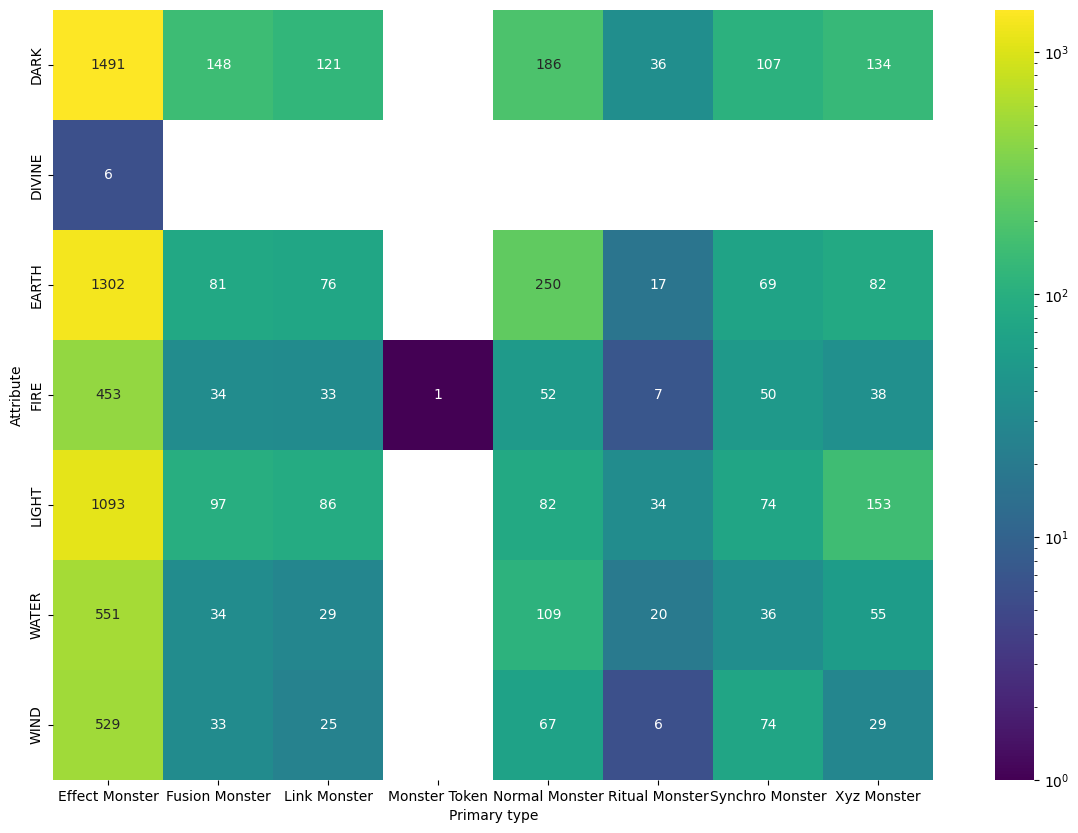

In [23]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Secondary types

In [24]:
print('Total number of secondary types:', formatted_monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [25]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

,Name,Password,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Secondary type,,,,,,,,,,,,,,,,
Flip monster,183,182,2,6,19,12,38,33,1,20,45,1,3,3,4,183
Gemini monster,45,45,1,6,18,8,17,19,0,6,13,0,3,1,1,45
Spirit monster,37,37,2,6,13,9,22,20,2,7,4,1,1,2,2,37
Toon monster,17,17,1,6,7,5,12,15,0,8,13,1,2,1,2,17
Tuner monster,472,467,5,6,23,9,32,32,7,58,134,3,3,4,4,471
Union monster,37,37,1,6,9,8,17,14,0,6,9,1,2,1,1,37


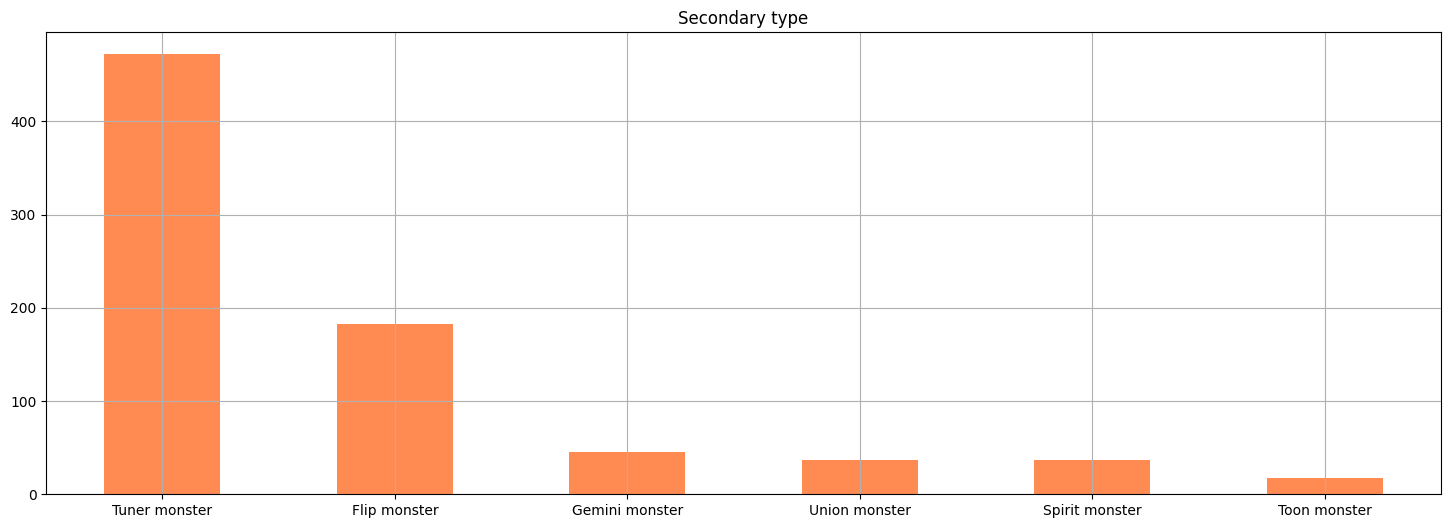

In [26]:
secondary_type_colors = card_colors['Effect Monster']
formatted_monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(formatted_full_df['Secondary type'],formatted_full_df['Attribute'])
secondary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Secondary type,,,,,,
Flip monster,51,61,10,31,13,17
Gemini monster,11,8,8,6,8,4
Spirit monster,5,6,6,4,6,10
Toon monster,7,5,1,2,1,1
Tuner monster,122,91,43,95,51,70
Union monster,6,9,3,12,4,3


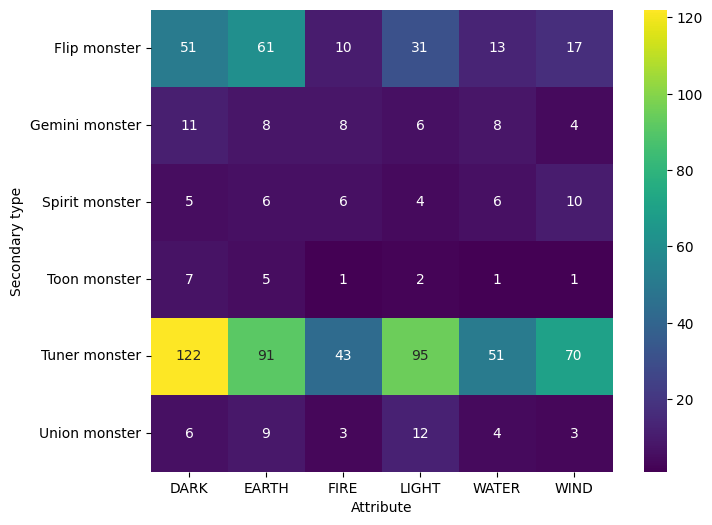

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Primary type,,,,,,,
Effect Monster,182,45,35,17,425,37,741
Fusion Monster,0,0,0,0,3,0,3
Normal Monster,0,0,0,0,12,0,12
Ritual Monster,1,0,2,0,2,0,5
Synchro Monster,0,0,0,0,30,0,30
All,183,45,37,17,472,37,791


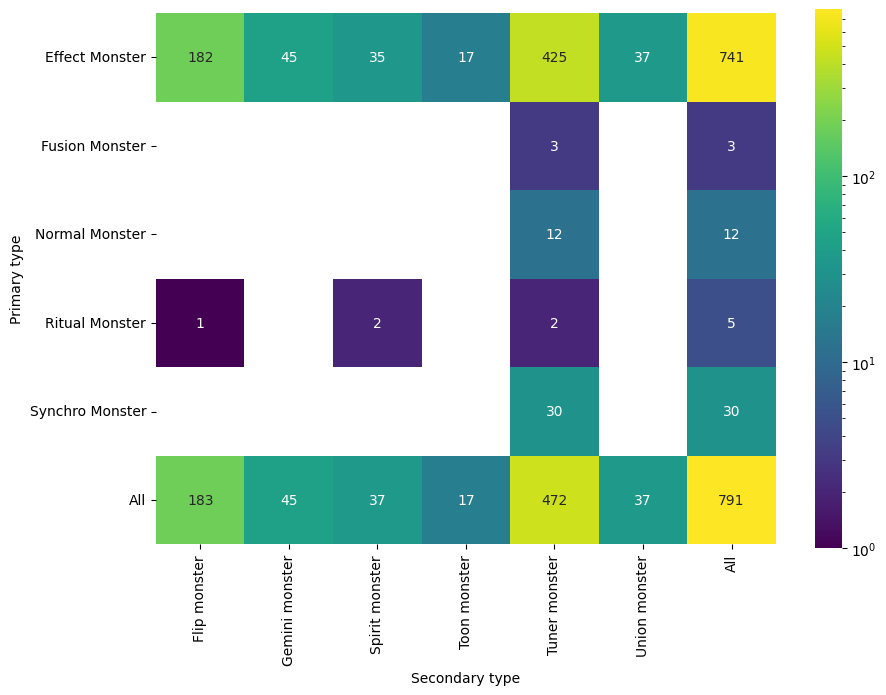

In [30]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Monster types

In [31]:
print('Total number of monster types:', formatted_monster_df['Monster type'].nunique())

Total number of monster types: 25


In [32]:
formatted_monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Monster type,,,,,,,,,,,,,,,,,,
Aqua,255,253,7,6,6,10,50,33,3,2,3,50,64,1,3,4,5,255
Beast,376,369,7,4,6,10,48,38,7,2,7,59,84,2,3,4,4,377
Beast-Warrior,237,233,7,3,6,10,36,29,6,3,7,57,47,2,3,4,5,236
Creator God,1,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1
Cyberse,254,245,7,1,6,11,30,29,1,6,39,45,36,3,2,5,5,254
Dinosaur,122,121,6,1,6,10,35,30,4,2,3,35,24,1,2,3,3,122
Divine-Beast,5,0,1,0,1,1,3,3,0,0,0,5,2,1,3,2,2,8
Dragon,656,651,7,6,6,13,52,48,9,5,19,108,185,3,3,6,6,654
Fairy,510,502,7,5,6,12,43,38,9,4,12,81,112,3,3,6,5,507


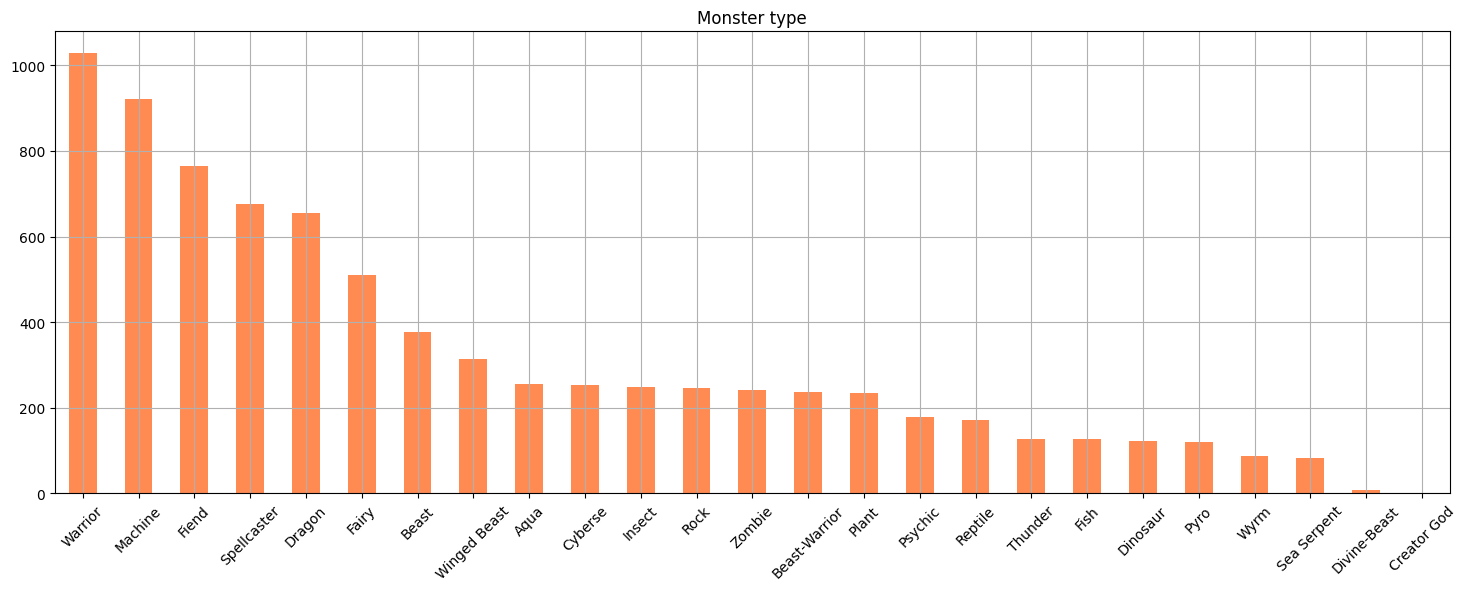

In [33]:
monster_type_colors = card_colors['Monster Card']
formatted_monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,,
Aqua,9,0,6,10,4,220,6
Beast,37,0,213,16,72,14,25
Beast-Warrior,37,0,82,54,33,16,15
Creator God,0,1,0,0,0,0,0
Cyberse,70,0,37,44,63,28,12
Dinosaur,11,0,60,32,5,8,6
Divine-Beast,0,8,0,0,0,0,0
Dragon,253,0,47,48,167,28,113
Fairy,55,0,62,17,325,26,25


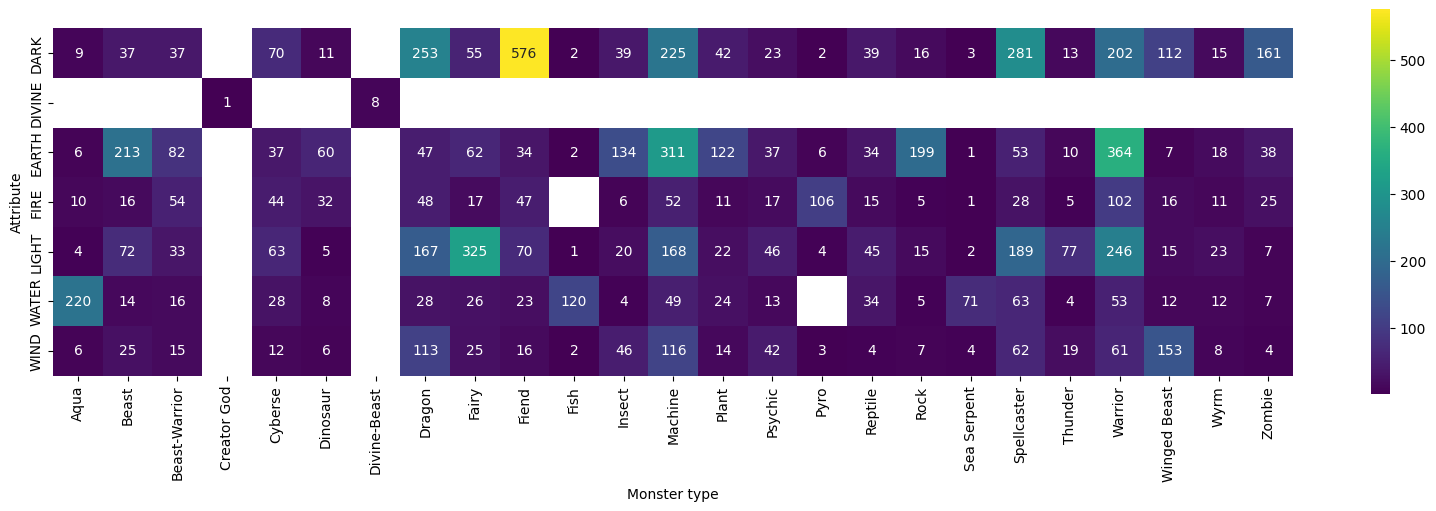

In [35]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Monster type,,,,,,,,
Aqua,153,11,3,0,59,8,4,17
Beast,271,17,9,0,54,1,14,11
Beast-Warrior,163,11,9,0,21,2,8,23
Creator God,1,0,0,0,0,0,0,0
Cyberse,125,5,96,0,7,7,5,9
Dinosaur,87,7,3,0,18,0,4,3
Divine-Beast,5,0,0,0,0,0,0,0
Dragon,346,63,33,0,46,15,93,60
Fairy,363,21,24,0,36,17,17,32


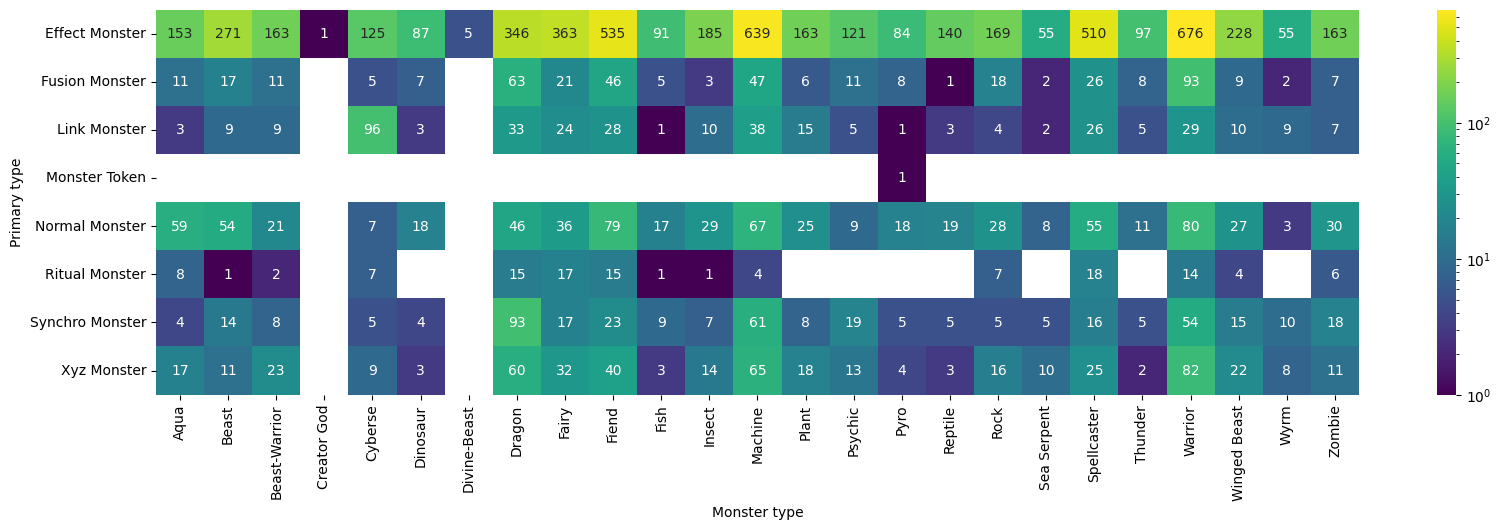

In [37]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster
Monster type,,,,,,
Aqua,4,4,1,1,10,3
Beast,15,1,2,0,22,0
Beast-Warrior,1,0,1,0,9,0
Cyberse,0,0,0,0,7,0
Dinosaur,0,0,0,0,7,0
Dragon,1,6,1,3,42,4
Fairy,8,2,7,0,20,5
Fiend,27,4,2,1,41,1
Fish,0,1,0,0,8,0


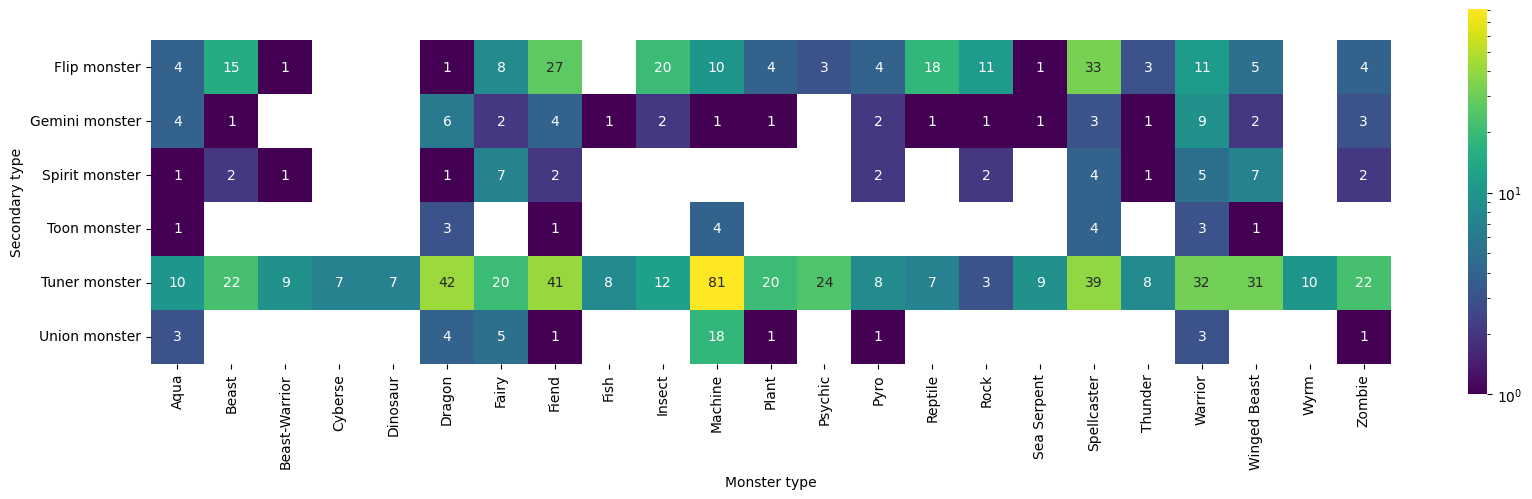

In [39]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

### Effect type

In [40]:
print('Total number of effect types:', formatted_monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [41]:
formatted_monster_df[formatted_monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Effect type,,,,,,,,,,,,,,,,,,
Activation condition,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1
Condition,3067,3014,7,6,7,25,14,63,63,13,6,54,639,3,3,5,6,3047
Continuous Effect,2147,2138,6,5,7,24,14,59,52,12,6,48,558,3,3,4,4,2143
Continuous-like Effect,234,234,6,3,6,21,11,42,36,13,1,2,72,2,3,3,2,234
Flip effect,169,168,1,1,6,19,12,38,33,1,0,0,43,1,3,3,4,169
Ignition Effect,2600,2581,6,6,7,24,13,66,61,12,5,42,637,3,3,5,6,2591
Ignition-like Effect,218,211,6,2,6,20,12,35,32,13,1,1,74,1,3,3,6,218
Lingering effect,17,17,2,1,6,12,7,12,14,0,2,2,10,0,0,2,2,16
Maintenance cost,44,44,3,0,6,12,8,21,18,2,1,1,8,0,1,1,1,44


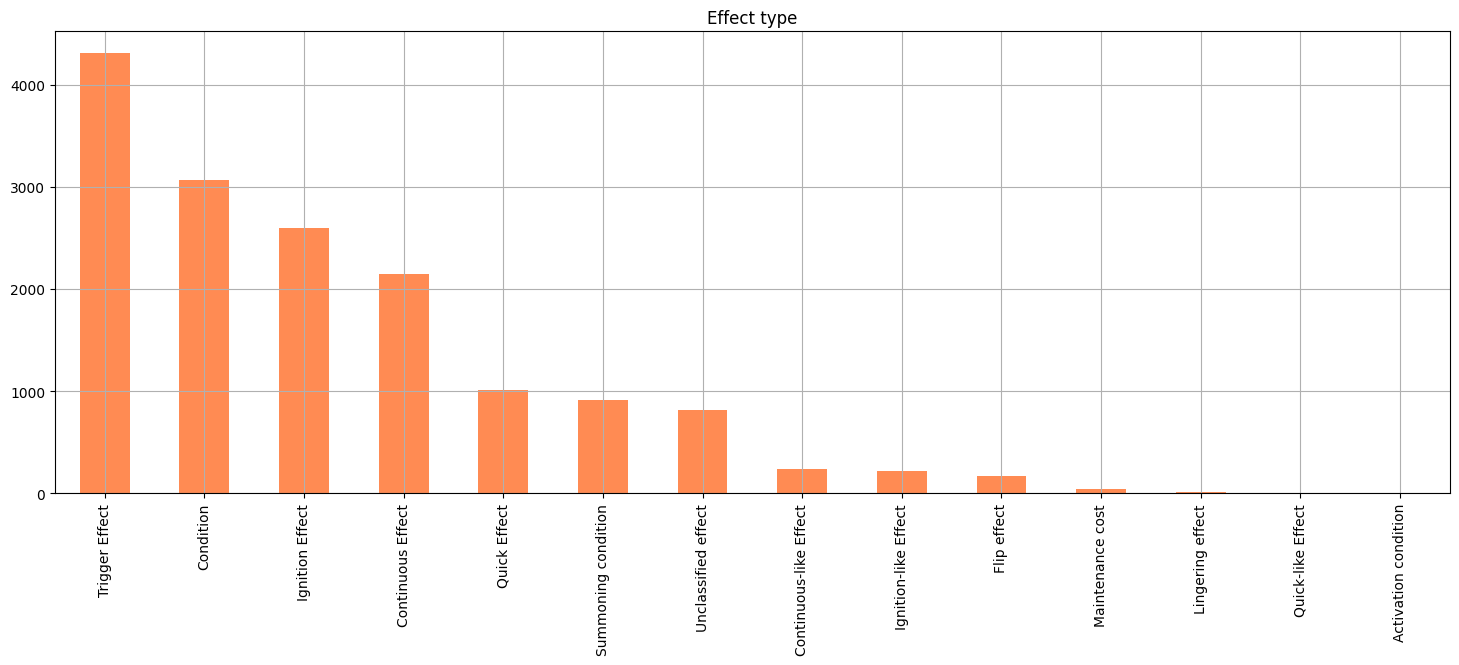

In [42]:
monster_effect_colors = card_colors['Effect Monster']
formatted_monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
plt.show()

### ATK

In [43]:
print('Total number of ATK values:', formatted_monster_df['ATK'].nunique())

Total number of ATK values: 82


In [44]:
formatted_monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
ATK,,,,,,,,,,,,,,,,,,
0,617,589,8,5,6,23,13,35,9,5,15,93,234,3,3,6,6,616
50,2,2,1,0,2,2,1,2,0,0,0,2,2,0,0,1,1,2
100,217,217,5,3,6,20,11,27,8,2,2,48,107,2,3,3,2,217
150,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1
200,118,118,6,5,6,20,7,21,4,1,2,34,67,1,3,2,2,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,12,12,3,0,3,6,4,4,0,0,0,10,9,1,1,1,1,12
4600,2,2,1,0,2,1,1,1,0,0,0,2,1,1,0,1,1,2
5000,9,9,5,0,3,4,2,4,0,1,1,8,6,1,1,1,1,9


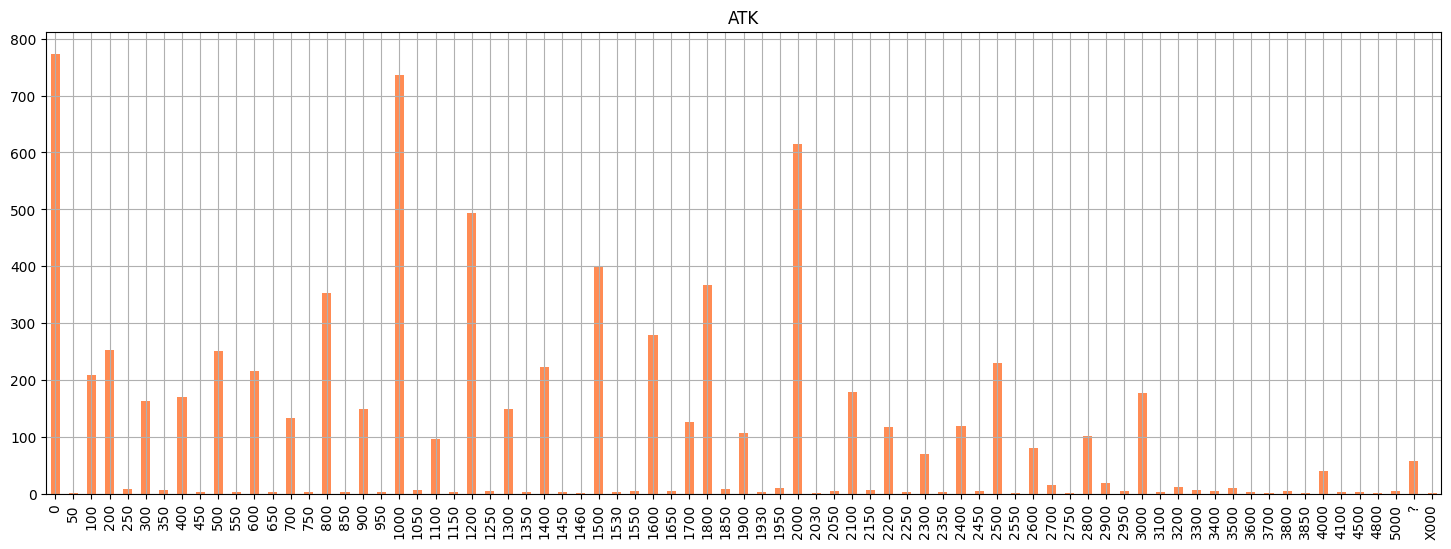

In [45]:
atk_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [46]:
print('Total number of DEF values:', formatted_monster_df['DEF'].nunique())

Total number of DEF values: 77


In [47]:
formatted_monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
DEF,,,,,,,,,,,,,,,,,,
0,774,745,7,6,6,23,14,45,10,0,0,104,259,2,3,5,5,771
50,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1
100,209,209,5,4,6,19,10,24,8,0,0,47,95,2,3,3,3,208
200,252,248,5,5,6,23,10,31,5,0,0,48,109,2,3,3,5,252
250,8,8,2,1,4,5,2,4,0,0,0,5,3,0,1,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,2,2,2,0,2,2,1,1,0,0,0,2,1,0,0,1,1,2
4800,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1
5000,5,5,2,0,3,3,2,2,0,0,0,4,3,1,1,1,1,5


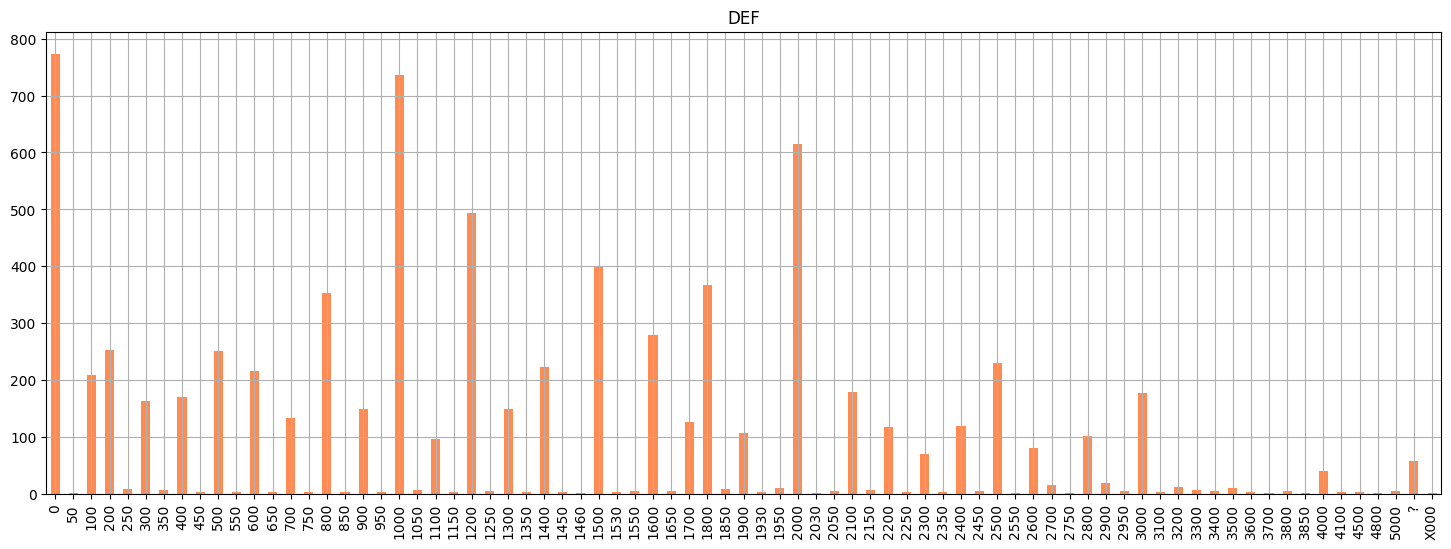

In [48]:
def_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [49]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,ATK,DEF,Pendulum Scale,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Level/Rank,,,,,,,,,,,,,,,,
0,6,6,2,0,2,2,3,3,0,5,3,0,0,2,2,6
1,630,603,7,5,6,23,22,29,10,80,227,2,3,4,5,628
2,674,666,6,5,6,23,29,30,7,74,213,2,3,4,6,673
3,1147,1141,6,5,6,23,41,36,9,93,292,3,3,5,7,1147
4,2337,2326,6,6,6,23,54,47,9,134,506,3,3,5,7,2330
5,597,593,6,6,6,23,46,38,8,84,239,2,3,3,4,597
6,609,605,6,6,6,23,38,38,9,92,234,3,3,6,6,610
7,467,462,6,6,6,23,38,35,9,100,225,2,3,5,5,469
8,674,660,6,5,6,23,42,41,8,111,299,3,3,5,6,675


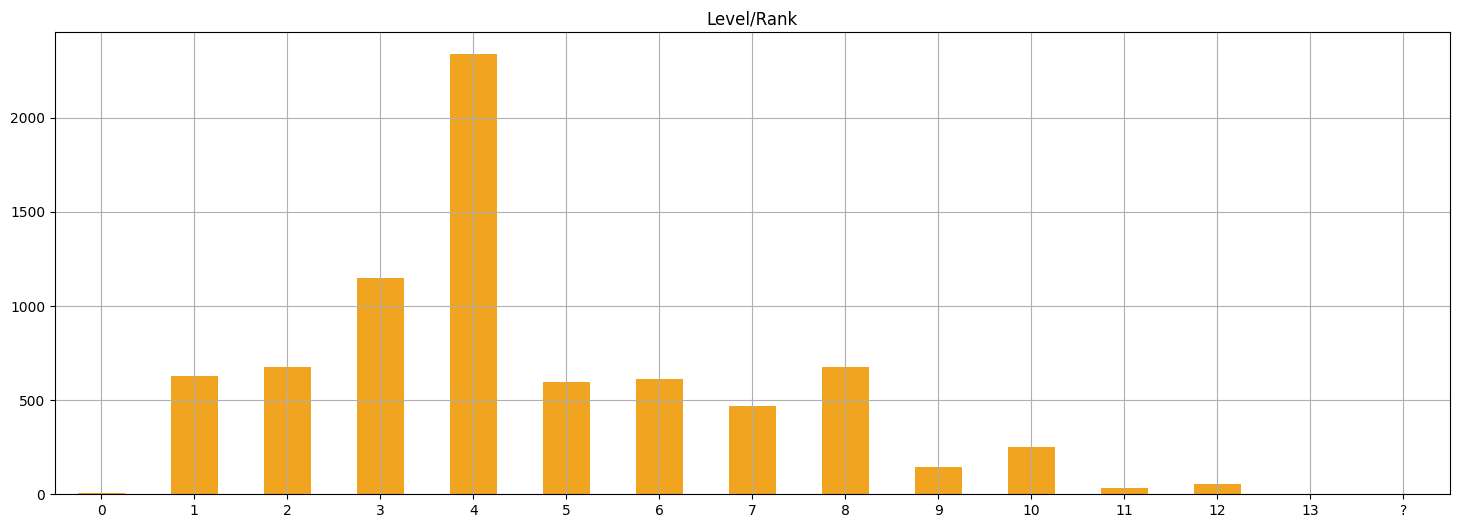

In [50]:
stars_colors = card_colors['Level']
formatted_monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [51]:
formatted_monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            620.0   239.435484   351.717003  0.0     0.0   100.0   300.0   
2            672.0   581.770833   408.797066  0.0   300.0   500.0   800.0   
3           1144.0   958.260490   485.687036  0.0   600.0  1000.0  1300.0   
4           2325.0  1418.550538   540.073310  0.0  1200.0  1500.0  1800.0   
5            594.0  1762.070707   642.211547  0.0  1500.0  1900.0  2200.0   
6            606.0  2014.603960   612.457797  0.0  1900.0  2200.0  2400.0   
7            463.0  2284.773218   619.488951  0.0  2200.0  2500.0  2600.0   
8            666.0  2548.723724   705.223705  0.0  2500.0  2800.0  3000.0   
9            140.0  2601.785714   842.196740  0.0  2500.0  2800.0  3000.0   
10           226.0  2812.610619  1228.687755  0.0  2800.0  3000.0  3500.0   
11            30.0  2990.000000  1093.113238  0.0  3000.0  3350.0  3500.0   
12            48.0  3354.166667  1388.701879  0.0  3000.0  4000.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [52]:
formatted_monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            622.0   336.575563   518.561130  0.0     0.0   100.0   400.0   
2            673.0   659.286776   554.854734  0.0   200.0   500.0   900.0   
3           1144.0   954.370629   572.131398  0.0   600.0   900.0  1300.0   
4           2327.0  1168.599055   607.909826  0.0   800.0  1200.0  1600.0   
5            595.0  1424.705882   675.032888  0.0  1000.0  1500.0  1900.0   
6            606.0  1552.854785   711.322783  0.0  1200.0  1600.0  2000.0   
7            465.0  1886.666667   653.772760  0.0  1600.0  2000.0  2300.0   
8            673.0  1977.711738   846.593029  0.0  1600.0  2100.0  2500.0   
9            140.0  2314.642857   789.647413  0.0  2000.0  2500.0  2925.0   
10           235.0  2218.085106  1285.413962  0.0  1800.0  2500.0  3000.0   
11            30.0  2661.666667  1169.415071  0.0  2125.0  3000.0  3400.0   
12            49.0  2881.632653  1627.456281  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [53]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Pendulum Scale,,,,,,,,,,,,,,,,
0,10,10,2,1,5,7,6,5,5,8,8,1,0,1,1,10
1,68,65,5,2,6,10,11,28,26,37,39,1,1,3,4,68
2,36,36,2,1,6,11,6,17,22,21,15,1,2,3,2,36
3,36,36,2,1,6,15,8,22,15,23,17,0,0,1,1,36
4,32,32,5,0,5,8,8,18,16,25,16,1,1,1,1,32
5,34,34,2,1,6,12,7,23,21,20,16,0,1,3,3,34
6,15,15,1,1,4,7,6,11,11,11,9,0,0,1,1,15
7,27,27,2,1,6,14,6,19,17,14,16,1,2,1,1,27
8,40,40,5,1,6,9,8,19,18,23,21,0,0,1,3,40


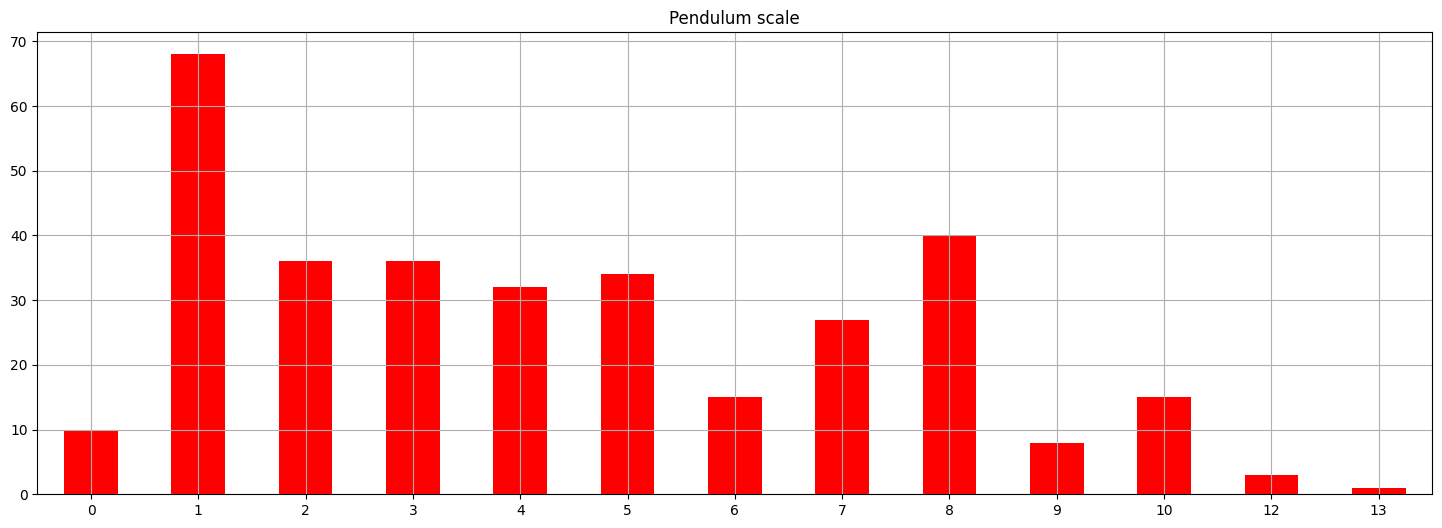

In [54]:
scales_colors = card_colors['Pendulum Monster']
formatted_monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [55]:
formatted_monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1390.000000  1317.784336     0.0     0.0  1450.0   
1               67.0  1747.761194  1045.822601     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               36.0  1437.500000   845.354955     0.0   600.0  1725.0   
4               32.0  1787.500000  1011.785391     0.0  1100.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               40.0  1232.500000   957.129121     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2025.0  2600.0  
4               2550.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               2000.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [56]:
formatted_monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1200.000000  1273.664878     0.0     0.0   750.0   
1               68.0  1592.647059   949.204880     0.0   975.0  1750.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               36.0  1165.277778   788.834533     0.0   575.0  1200.0   
4               32.0  1534.375000   830.316448     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               40.0  1027.500000   783.479255     0.0   375.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2075.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1700.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [57]:
formatted_monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    10.0  6.100000  3.348300  1.0  3.75   7.0   8.00  10.0
1                    68.0  5.985294  2.421870  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    36.0  4.444444  1.731134  1.0  4.00   4.0   5.00  10.0
4                    32.0  5.562500  2.154328  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    40.0  3.925000  2.324755  1.0  2.00   4.0   6.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [58]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Attribute,Monster type,ATK,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link,,,,,,,,,,,,,
1,47,47,6,11,10,8,17,26,1,0,3,3,47
2,185,185,6,23,24,19,31,102,3,2,2,3,183
3,83,82,6,16,17,17,25,47,2,1,2,3,83
4,44,41,6,16,12,13,21,24,3,0,3,4,44
5,9,6,2,5,4,3,6,5,0,0,3,2,9
6,2,1,1,1,2,2,2,2,0,0,1,2,2


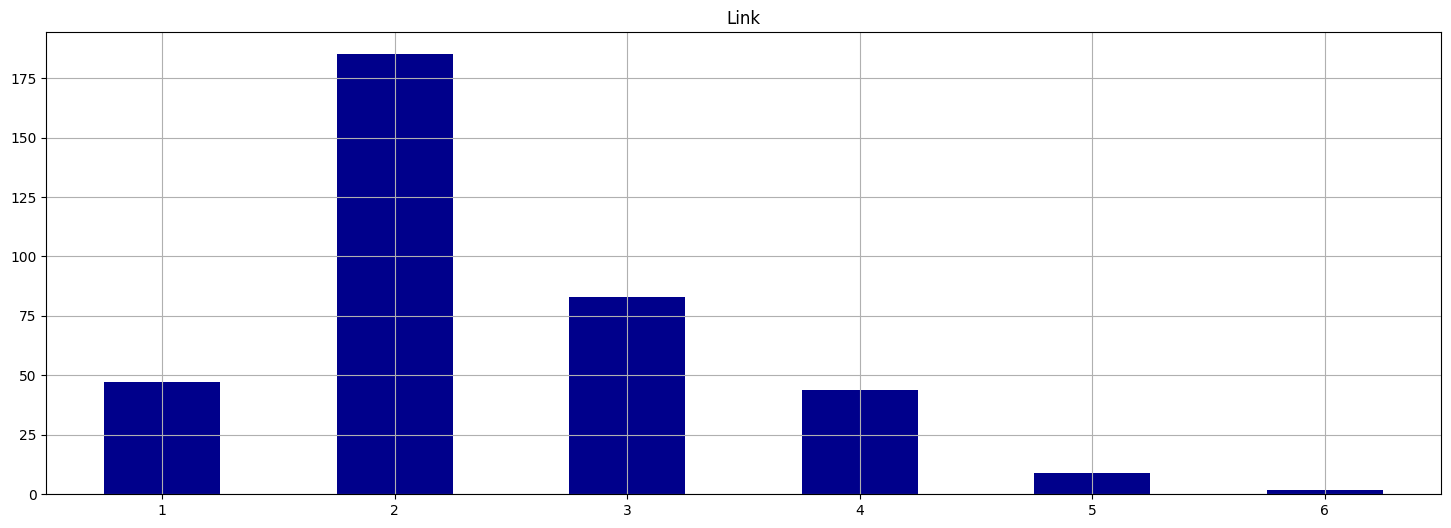

In [59]:
link_colors = card_colors['Link Monster']
formatted_monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [60]:
formatted_monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      47.0   736.170213   482.937358     0.0   400.0   800.0  1000.0  1500.0
2     185.0  1405.135135   510.182308     0.0  1100.0  1500.0  1800.0  2300.0
3      83.0  2253.614458   653.358263     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print('Total number of link arrow combinations:', formatted_monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [62]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link Arrows,,,,,,,,,,,,
"(←,)",5,5,2,3,2,4,4,0,0,3,2,5
"(←, ↑)",4,4,2,3,4,3,2,0,0,1,1,4
"(←, →)",18,18,6,8,11,8,9,1,0,2,2,18
"(←, →, ↑)",8,7,4,5,6,7,5,0,0,1,2,8
"(↑,)",10,10,5,5,6,9,5,0,0,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
"(↙, ↘, ←, ↖)",1,1,1,1,1,1,1,0,0,1,1,1
"(↙, ↘, ↑)",22,22,6,11,11,11,15,2,1,2,2,22
"(↙, ↘, →)",2,2,2,2,2,2,2,0,0,1,1,2


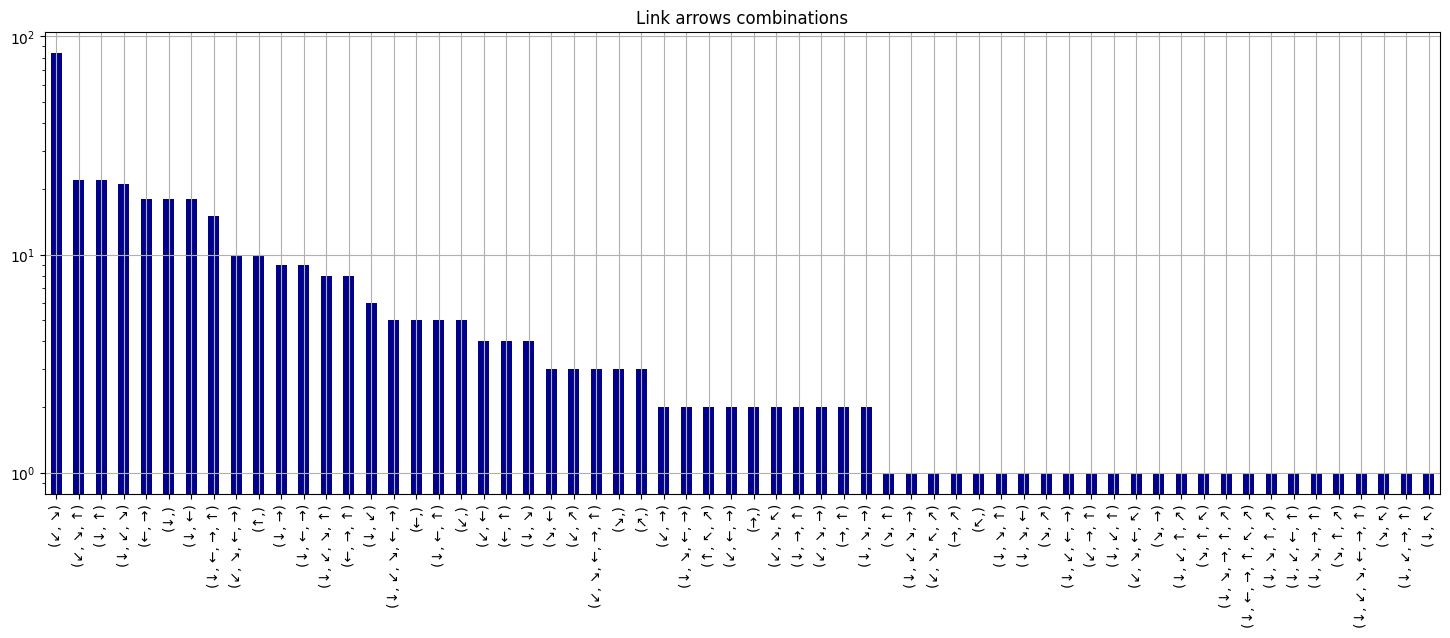

In [63]:
arrows_colors = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].value_counts().plot.bar(figsize = (18,6), logy=True, grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [64]:
formatted_monster_df[formatted_monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Link,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link Arrows,,,,,,,,,,,,,
←,117,109,6,21,29,6,35,46,3,0,5,4,117
↑,117,112,6,19,27,6,31,44,3,1,4,5,117
→,103,95,6,19,27,6,30,40,2,0,4,4,103
↓,160,153,6,20,31,6,41,68,3,0,3,5,159
↖,11,10,5,5,10,5,6,6,2,0,1,3,11
↗,16,15,5,7,11,6,7,8,2,0,1,3,16
↘,186,183,6,22,32,6,35,103,3,2,4,4,185
↙,189,186,6,22,33,6,37,104,3,2,4,4,188


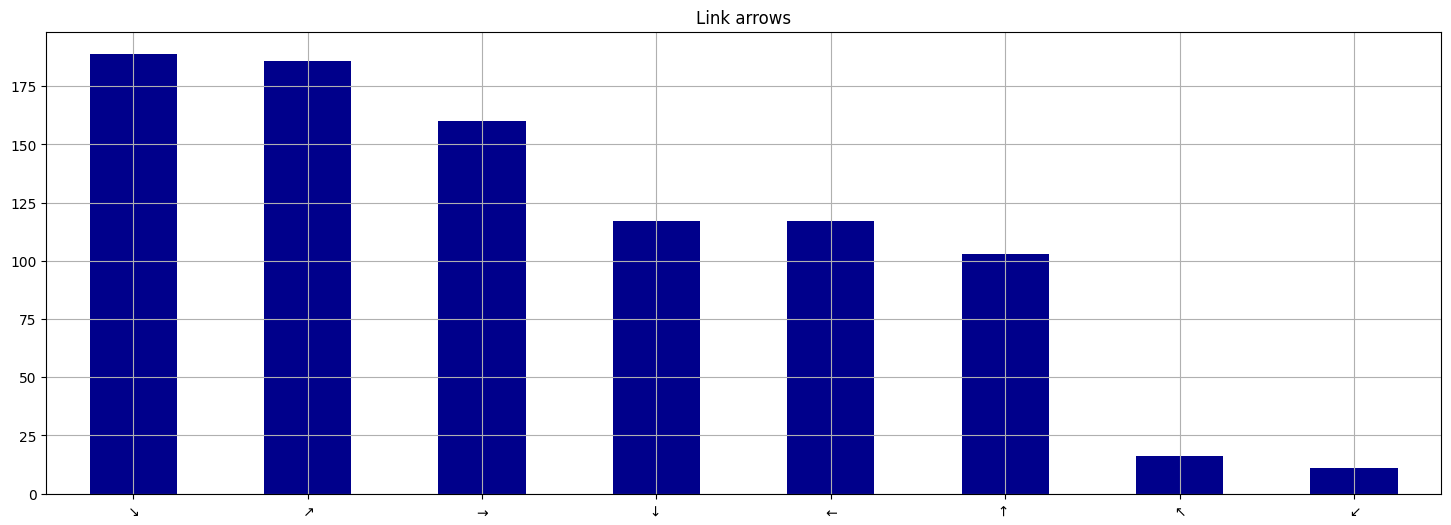

In [65]:
arrows_colors_b = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [ ]:
arrow_per_link = formatted_monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

## Spell & Trap

### Properties

In [ ]:
print('Total number of properties:', formatted_st_df['Property'].nunique())

In [ ]:
formatted_st_df.drop(columns=['Card type']).groupby('Property').nunique()

In [ ]:
st_colors = [card_colors[i] for i in formatted_full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
formatted_st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [ ]:
print('Total number of effect types:', formatted_st_df['Effect type'].explode().nunique())

In [ ]:
formatted_st_df.explode('Effect type').groupby('Effect type').nunique()

#### Spell & Trap discrimination

In [ ]:
spell = formatted_spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = formatted_trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1)
st_diff

In [ ]:
st_diff_colors = {'Spell Card': card_colors['Spell Card'], 'Trap Card': card_colors['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [ ]:
exploded_archseries = formatted_full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

In [ ]:
exploded_archseries.groupby('Archseries').nunique()

In [ ]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [ ]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

### By primary type

In [ ]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b



### By secondary type

In [ ]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

### By monster type

In [ ]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

### By property

In [ ]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

## Artworks

In [ ]:
print('Total number of cards with edited or alternate artworks:', formatted_full_df['Artwork'].count())

In [ ]:
formatted_full_df[['Name','Password','TCG status','OCG status','Artwork']][formatted_full_df['Artwork'].notna()]

In [ ]:
artwork_value_counts = formatted_full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [ ]:
artwork_crosstab = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Card type'])
artwork_crosstab

### By primary type

In [ ]:
artwork_crosstab_b = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Primary type'])
artwork_crosstab_b

More granularity is unnecessary

## Errata

In [ ]:
print('Total number of cards with name or type errata:', formatted_full_df['Errata'].count())

In [ ]:
formatted_full_df[['Name','Password','TCG status','OCG status','Errata']][formatted_full_df['Errata'].notna()]

In [ ]:
errata_value_counts = formatted_full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [ ]:
errata_crosstab = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Card type'])
errata_crosstab

### By primary type

In [ ]:
errata_crosstab_b = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Primary type'])
errata_crosstab_b

More granularity is unnecessary

### By artwork

In [ ]:
errata_crosstab_c = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Errata'])
errata_crosstab_c

## TCG & OCG status

### TGC status

In [ ]:
print('Total number of TCG status:', formatted_full_df['TCG status'].nunique())

In [ ]:
formatted_full_df.groupby('TCG status', dropna=False).nunique()

In [ ]:
formatted_full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
tcg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=LogNorm())
plt.show()

#### By monster type

In [ ]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True, norm=LogNorm())
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

### OCG status

In [ ]:
print('Total number of OCG status:', formatted_full_df['OCG status'].nunique())

In [ ]:
formatted_full_df.groupby('OCG status', dropna=False).nunique()

In [ ]:
formatted_full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
ocg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=LogNorm())
plt.show()

#### By monster type

In [ ]:
# Remove unlimited
ocg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True, norm=LogNorm())
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

### TCG vs. OCG status

In [ ]:
cg_crosstab = pd.crosstab(formatted_full_df['OCG status'],formatted_full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

# Searches

In [ ]:
formatted_full_df.loc[formatted_full_df['OCG status'] == 'Not yet released'].loc[formatted_full_df['TCG status'] == 'Not yet released']

# HTML export

In [ ]:
! jupyter nbconvert Cards.ipynb --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

# Git

In [ ]:
! git add .

In [ ]:
! git commit -m {"Update-" + pd.Timestamp.now().strftime("%d%m%Y")}

In [ ]:
! git push